In [2]:
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)

### 对$f(x) = {{(x-0.4)^4} \over {\int_0^1{(x-0.4)^4 dx}}}$, 进行接受拒绝采样

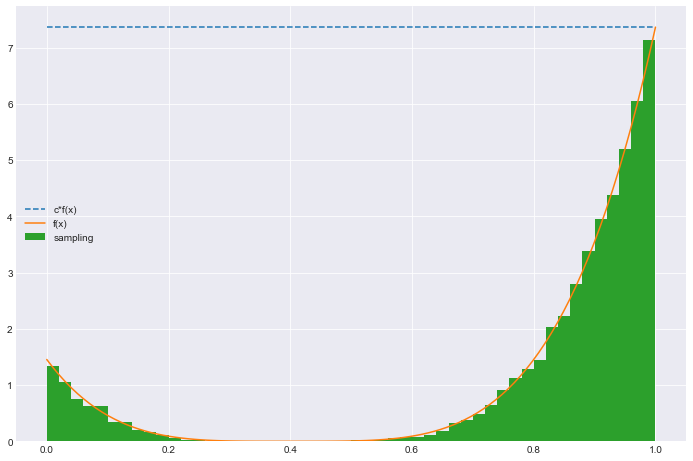

10000


In [7]:
def AcceptReject(split_val):
    global c
    global power
    while True:
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        if y*c <= math.pow(x - split_val, power):
            return x

        
power = 4
t = 0.4
sum_ = (math.pow(1-t, power+1) - math.pow(-t, power + 1)) / (power + 1)
x = np.linspace(0, 1, 100)

c = 0.6 ** 4 / sum_
cc = [c for _ in x]
plt.plot(x, cc, '--', label='c*f(x)')
# 目标概率密度函数的值
y = [math.pow(xi - t, power) / sum_ for xi in x]
plt.plot(x, y, label='f(x)')

samples = []
for i in range(10000):
    samples.append(AcceptReject(t))
plt.hist(samples, bins=50, normed=True, label='sampling')
plt.legend()
plt.show()
print(len(samples))

### M-H采样：假设目标是一个mean=4，std=2的正态分布，而选择的马尔可夫链状态转移矩阵Q(i,j)的条件转移概率是mean=i，std=1的正态分布在位置j的值

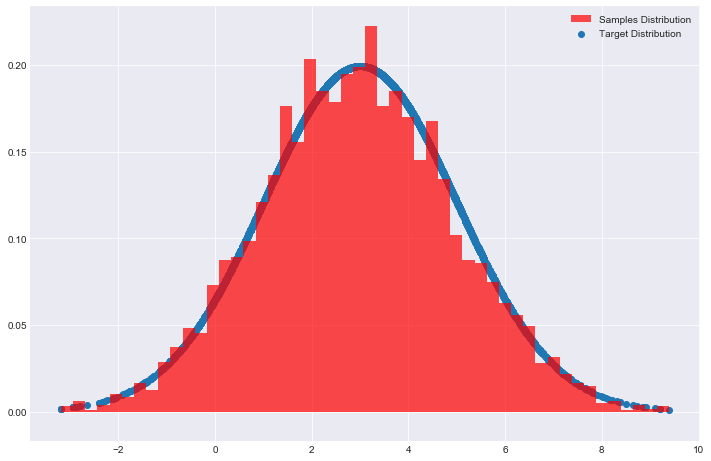

In [11]:
from scipy.stats import norm

def norm_dist_prob(theta):
    y = norm.pdf(theta, loc=3, scale=2)
    return y

T = 5000
pi = [0 for i in range(T)]
sigma = 1
t = 0
while t < T-1:
    t += 1
    pi_star = norm.rvs(loc=pi[t-1], scale=sigma, size=1, random_state=None)
    # 状态转移的alpha
    alpha = min(1, (norm_dist_prob(pi_star[0]) / norm_dist_prob(pi[t-1])))
    
    u = random.uniform(0, 1)
    pi[t] = pi_star[0] if u < alpha else pi[t-1]
    
plt.scatter(pi, norm.pdf(pi, loc=3, scale=2), label='Target Distribution')
num_bins = 50
plt.hist(pi, num_bins, normed=1, facecolor='red', alpha=0.7,label='Samples Distribution')
plt.legend()
plt.show()